# 1. Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 2. Dataset

In [2]:
M = np.array([0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.2, 2.4])
L = np.array([0.15, 0.35, 1.00, 2.30, 4.10, 7.00, 11.2, 17.5, 25.0, 35.0])

# 3. Visualización del dataset

Como se muestra en el grafico la relación entre la masa estelar y la luminosidad no es lineal por lo que una aproximacion lineal no es lo ideal 

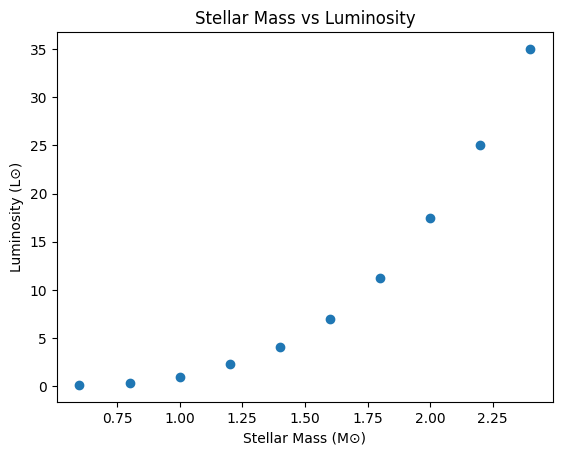

In [3]:
plt.scatter(M, L)
plt.xlabel("Stellar Mass (M⊙)")
plt.ylabel("Luminosity (L⊙)")
plt.title("Stellar Mass vs Luminosity")
plt.show()

# 4. Modelo y función de costo

In [4]:
def predict(M, w, b):
    return w * M + b

In [5]:
def compute_cost(M, L, w, b):
    m = M.shape[0]
    cost = 0
    for i in range(m):
        cost += (predict(M[i], w, b) - L[i])**2
    return cost / (2*m)


# 5. Superficie de costo

La superficie de costo representa el valor de la función de error cuadrático medio \( J(w, b) \) evaluada sobre una grilla de valores posibles de los parámetros \( w \) y \( b \).

Cada punto de la superficie corresponde a un modelo lineal.

El mínimo global de esta superficie representa la combinación de parámetros que minimiza el error de predicción sobre el conjunto de datos.

In [6]:
w_vals = np.linspace(-20, 20, 100)
b_vals = np.linspace(-20, 20, 100)

J = np.zeros((len(w_vals), len(b_vals)))

for i in range(len(w_vals)):
    for j in range(len(b_vals)):
        J[i, j] = compute_cost(M, L, w_vals[i], b_vals[j])


# 6. Gradientes

In [7]:
def compute_gradient(M, L, w, b):
    m = M.shape[0]
    dj_dw = 0
    dj_db = 0

    for i in range(m):
        err = (w * M[i] + b) - L[i]
        dj_dw += err * M[i]
        dj_db += err

    return dj_dw / m, dj_db / m


# 7. Gradient Descent

In [8]:
def gradient_descent(M, L, w, b, alpha, iters):
    J_hist = []

    for _ in range(iters):
        dj_dw, dj_db = compute_gradient(M, L, w, b)
        w -= alpha * dj_dw
        b -= alpha * dj_db
        J_hist.append(compute_cost(M, L, w, b))

    return w, b, J_hist


# 8. Versión vectorizada

In [9]:
def compute_gradient_vec(M, L, w, b):
    m = M.shape[0]
    err = (w * M + b) - L
    dj_dw = np.dot(err, M) / m
    dj_db = np.sum(err) / m
    return dj_dw, dj_db


# 9. Convergencia

La gráfica del costo muestra cómo el modelo va aprendiendo con cada iteración. Cuando el costo disminuye de forma constante, el descenso por gradiente está funcionando correctamente.

La velocidad de convergencia depende de la tasa de aprendizaje: valores pequeños hacen que el aprendizaje sea lento, mientra


In [12]:
w_init = 0
b_init = 0
alpha = 0.01
iters = 1000

w, b, J_hist = gradient_descent(M, L, w_init, b_init, alpha, iters)

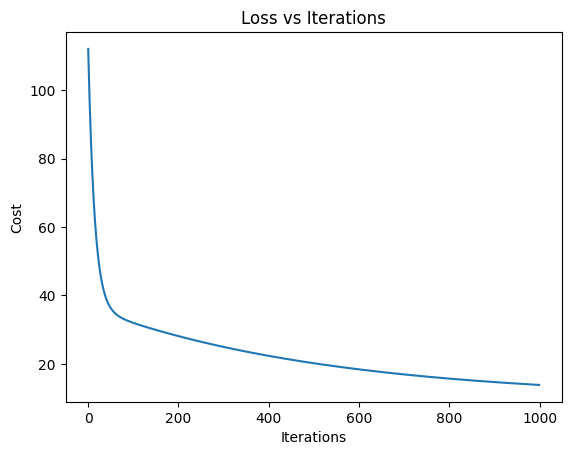

In [13]:
plt.plot(J_hist)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Loss vs Iterations")
plt.show()


# 10. Experimentos con learning rates

In [ ]:
alphas = [0.001, 0.01, 0.05]
iters = 1000

for a in alphas:
    w, b, J_hist = gradient_descent(M, L, 0, 0, a, iters)
    
    print(f"Learning rate = {a}")
    print(f"w final = {w:.4f}")
    print(f"b final = {b:.4f}")
    print(f"Costo final = {J_hist[-1]:.4f}")
    print("-" * 30)



Learning rate = 0.001
w final = 6.7738
b final = 1.5787
Costo final = 32.0267
------------------------------
Learning rate = 0.01
w final = 13.3648
b final = -8.9395
Costo final = 13.8218
------------------------------
Learning rate = 0.05
w final = 18.0235
b final = -16.6585
Costo final = 9.7972
------------------------------


# 11. Fit final

El modelo lineal capta la tendencia general entre la masa y la luminosidad pero comete errores. No gunciona tan bien para estrellas más masivas y se pasa para las de menor masa.

Esto ocurre porque la relación real entre masa y luminosidad no es lineal, lo que limita lo que un modelo lineal puede representar.




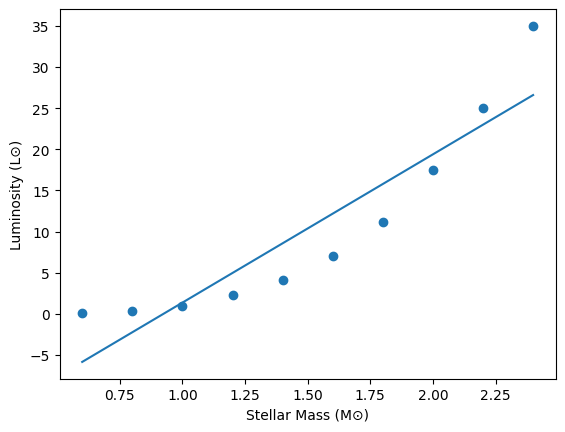

In [19]:
plt.scatter(M, L)
plt.plot(M, predict(M, w, b))
plt.xlabel("Stellar Mass (M⊙)")
plt.ylabel("Luminosity (L⊙)")
plt.show()


# 12. Preguntas conceptuales

### Significado astrofísico del parámetro w

El parámetro \( w \) representa la tasa de cambio promedio de la luminosidad con respecto a la masa estelar dentro del rango de datos considerado. Se puede interpretarse como una aproximación lineal a cómo varía la luminosidad al aumentar la masa

### Limitaciones del modelo lineal

Un modelo de regresión lineal no puede capturar relaciones curvas en el espacio original de las variables. Dado que la luminosidad estelar crece de forma no lineal con la masa